In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import accuracy_score
import sklearn.model_selection as ms
from sklearn.impute import SimpleImputer

In [35]:
attacks1 = pd.read_csv('/Users/mdrozdov/Documents/watermelon_tree/data/attacks5.csv')

/Users/mdrozdov/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
attacks1.Label.value_counts()

Benign           238037
Infilteration     93063
Label                25
Name: Label, dtype: int64

In [5]:
def labels_reader(path_to_labels):
    with open(f'{path_to_labels}', 'r') as file:
        lines = file.readlines()
    lines = [item.strip() for item in lines if item.strip() != 'Label']
    lines = list(enumerate(sorted(lines)))
    
    return lines

In [21]:
def my_imputer(df):
    if isinstance(df, pd.DataFrame):
        imp_mean = SimpleImputer(missing_values = np.nan,
                                strategy = 'mean')
        for column in df.columns:
            arr = np.array(df[column]).reshape(-1,1)
            df[column] = imp_mean.fit_transform(arr)
        
        return df
    
    else:
        imp_class = SimpleImputer(missing_values = np.nan,
                                strategy = 'most_frequent')
        df = imp_class.fit_transform(np.array(df).reshape(-1,1))

        return df

In [36]:
def attacks_cleaner(DF, path_to_labels):
    X_df = DF.drop(['Timestamp','Label'],axis=1)
    Y_df = DF.Label
    
    types_list = labels_reader(path_to_labels)
    
    for column in X_df.columns:
        X_df[column] = np.where(X_df[column] == f'{column}', np.nan, X_df[column])
        try:
            X_df[column] = np.where(np.isinf(X_df[column]),np.nan, X_df[column])
        except:
            X_df[column] = list(map(lambda x: float(x), X_df[column]))
            X_df[column] = np.where(np.isinf(X_df[column]),np.nan, X_df[column])
    
    for tup in types_list:
        Y_df = np.where(Y_df == tup[1],tup[0], Y_df)
    
    Y_df = np.where(Y_df == 'Label', np.nan, Y_df)
        
    X_df = my_imputer(X_df)
    Y_df = my_imputer(Y_df)
    
    return X_df, Y_df

In [38]:
X, Y = attacks_cleaner(attacks1,'./labels.txt')

In [65]:
Y = np.where(Y==0,0,1)
Y = Y.reshape(Y.shape[0],)

In [72]:
x_train, x_test, y_train, y_test = ms.train_test_split(X,Y, test_size = 0.8, shuffle = True)

In [73]:
rf = ensemble.RandomForestClassifier(oob_score = True,
                                    n_jobs = -1,
                                    n_estimators = 100)

In [74]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [80]:
rf.score(x_test,y_test)

0.7411287278218196

<BarContainer object of 78 artists>

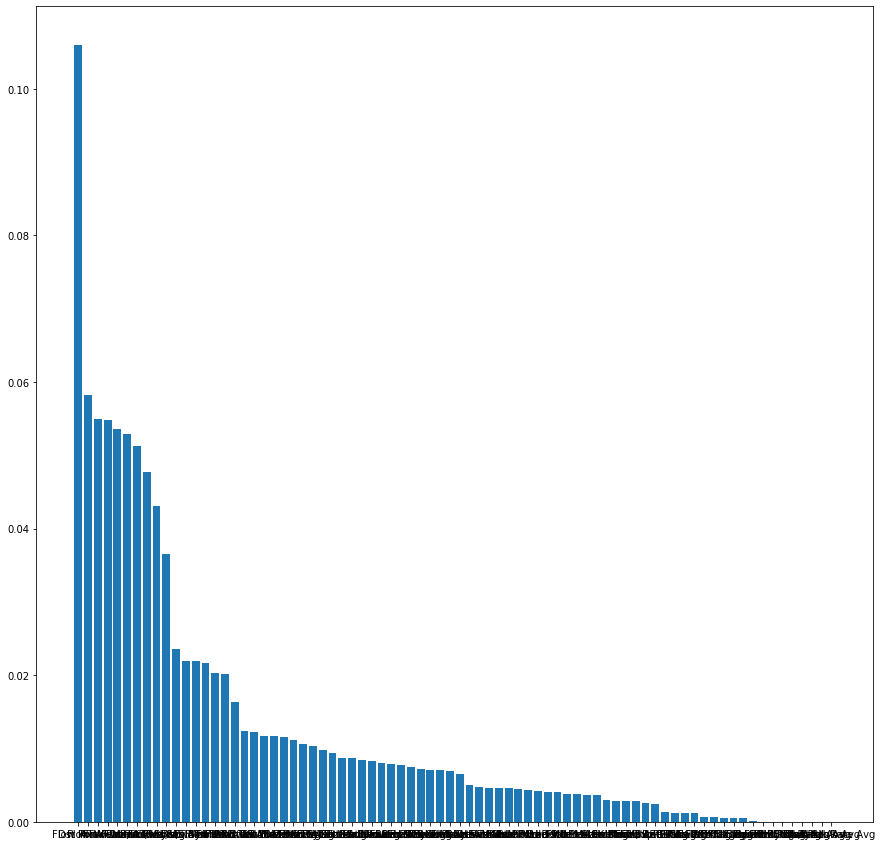

In [102]:
features = sorted(list(zip(x_train.columns,rf.feature_importances_)),key = lambda x: x[1], reverse = True)

plt.figure(figsize=(15,15))
plt.bar(list(zip(*features))[0],list(zip(*features))[1])

In [81]:
rf.feature_importances_

array([0.10595827, 0.00017337, 0.05362096, 0.00461813, 0.00237829,
       0.00840956, 0.00689573, 0.00806428, 0.00360565, 0.00871629,
       0.00409745, 0.00657677, 0.00432142, 0.00726066, 0.00381564,
       0.04314768, 0.05481172, 0.0581712 , 0.02024392, 0.05131482,
       0.05498641, 0.02013128, 0.02189868, 0.01629992, 0.0216281 ,
       0.02351788, 0.01040837, 0.01176082, 0.01122319, 0.01168497,
       0.01234868, 0.0006988 , 0.        , 0.00063268, 0.        ,
       0.00745123, 0.00414391, 0.05290224, 0.0476783 , 0.00360199,
       0.00940432, 0.01222144, 0.00870006, 0.00823136, 0.00048319,
       0.00052392, 0.00119154, 0.00706984, 0.00289758, 0.00123489,
       0.00053703, 0.00117358, 0.00260839, 0.01057715, 0.009791  ,
       0.00770122, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00505677, 0.00787006, 0.00279493,
       0.00712991, 0.03649808, 0.01158182, 0.00128657, 0.02196942,
       0.00467682, 0.00297433, 0.00473315, 0.0046729 , 0.00378